In [1]:
import pandas as pd
import numpy as np
import sns

In [2]:
import os
for dirname, _, filenames in os.walk('SNA/csv/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
book1 = pd.read_csv('csv/book1.csv')

In [9]:
book1.describe()

,weight,book
count,684.000000,684.0
mean,10.769006,1.0
std,17.294432,0.0
min,3.000000,1.0
25%,4.000000,1.0
50%,5.000000,1.0
75%,11.000000,1.0
max,291.000000,1.0


In [7]:
book1.isnull().sum()

Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64

In [10]:
book1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    object
 1   Target  684 non-null    object
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [11]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [4]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G = nx.Graph()

In [5]:
for _, edge in book1.iterrows():
    G.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G]
book_fnames = ['csv/book2.csv', 'csv/book3.csv', 'csv/book4.csv', 'csv/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [6]:
# Verifica dei valori nulli in ciascun file
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    print(f"File: {book_fname}")
    print(book1.isnull().sum())  # Conta i valori nulli per ogni colonna
    print("-" * 40)

File: csv/book2.csv
Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64
----------------------------------------
File: csv/book3.csv
Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64
----------------------------------------
File: csv/book4.csv
Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64
----------------------------------------
File: csv/book5.csv
Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64
----------------------------------------


     book                    Character  count Target
42      1                 Eddard-Stark     51      0
22      1                Catelyn-Stark     39      0
18      1                   Bran-Stark     30      0
9       1                   Arya-Stark     27      0
24      1             Cersei-Lannister     23      0
..    ...                          ...    ...    ...
982     5              Tybero-Istarion      1      0
984     5              Tywin-Lannister      1      0
985     5            Victarion-Greyjoy      1      0
986     5  Walder-Frey-(son-of-Jammos)      1      0
987     5                       Yandry      1      0

[988 rows x 4 columns]


C:\Users\tosca\AppData\Local\Temp\ipykernel_21096\4176571430.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Character', data=subset, palette='viridis')


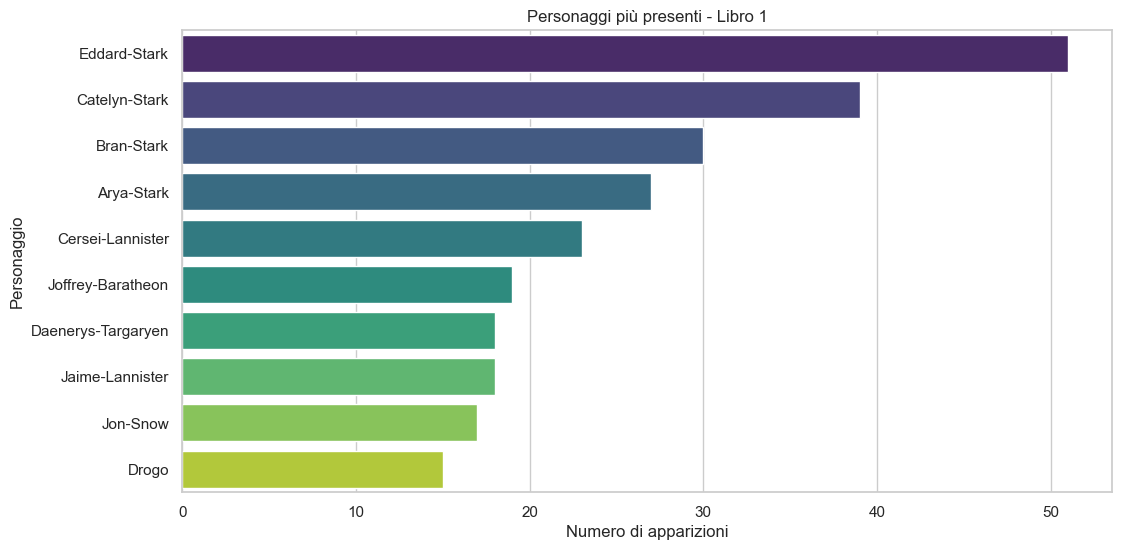

C:\Users\tosca\AppData\Local\Temp\ipykernel_21096\4176571430.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Character', data=subset, palette='viridis')


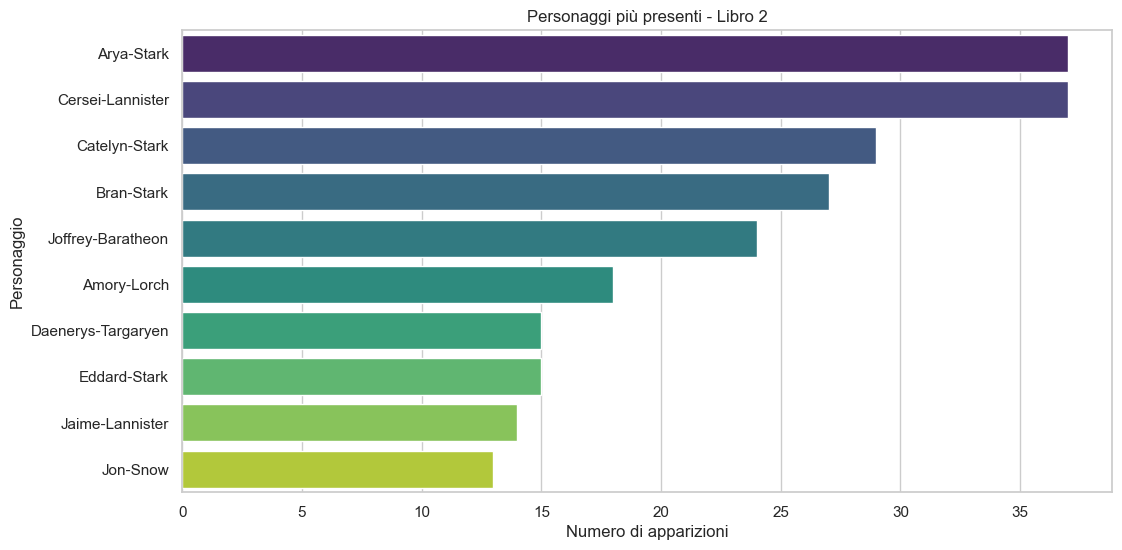

C:\Users\tosca\AppData\Local\Temp\ipykernel_21096\4176571430.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Character', data=subset, palette='viridis')


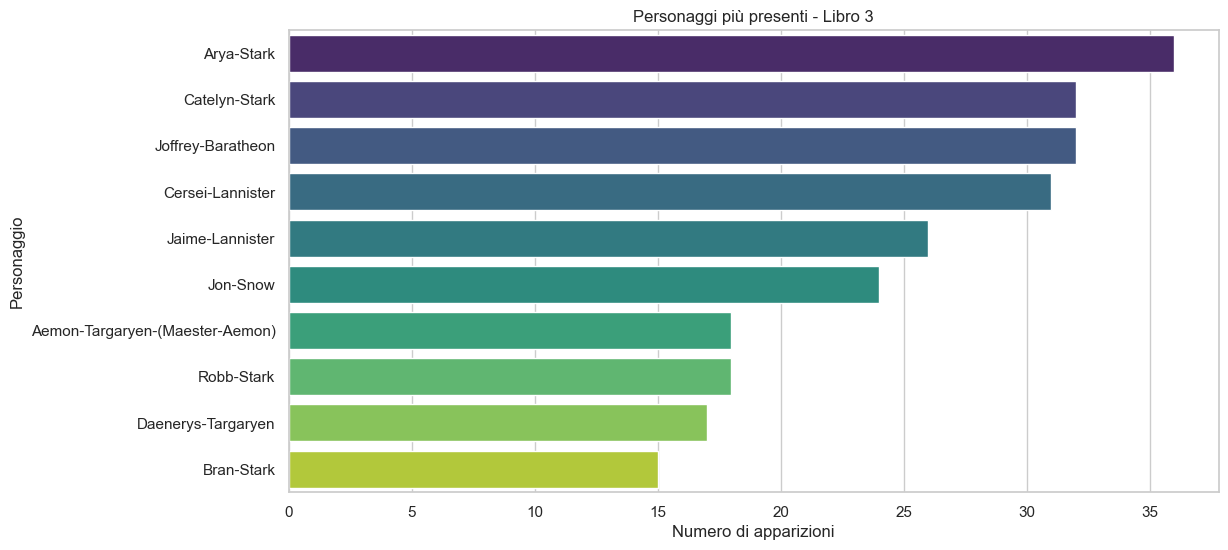

C:\Users\tosca\AppData\Local\Temp\ipykernel_21096\4176571430.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Character', data=subset, palette='viridis')


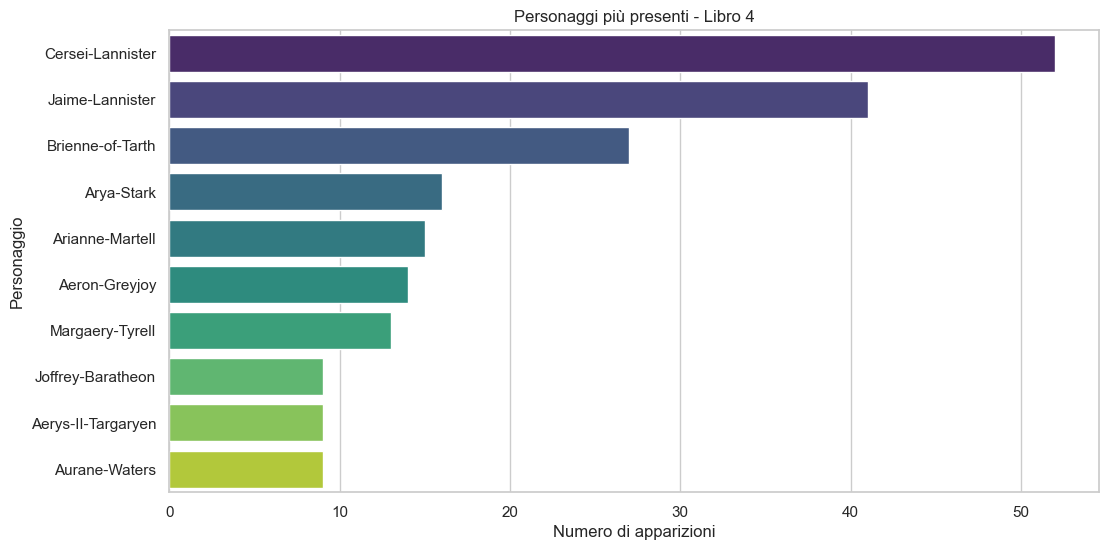

C:\Users\tosca\AppData\Local\Temp\ipykernel_21096\4176571430.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Character', data=subset, palette='viridis')


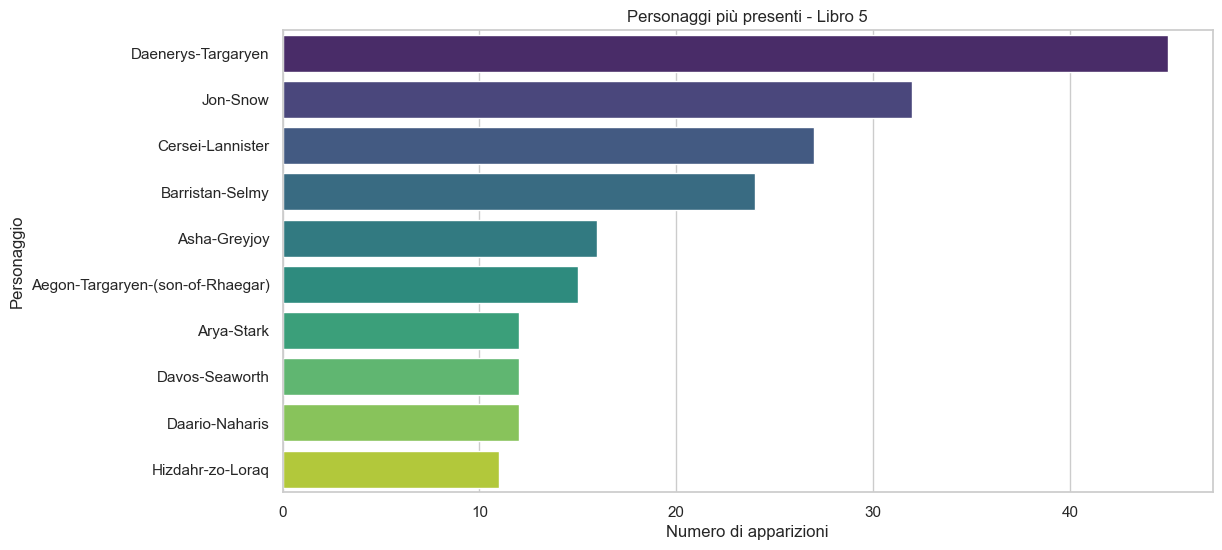

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creare un DataFrame vuoto per raccogliere i dati
all_books = book1.copy()
all_books['book'] = 1  # Assegna il numero del libro

for i, book_fname in enumerate(book_fnames, start=2):
    book = pd.read_csv(book_fname)
    book['book'] = i  # Assegna il numero del libro
    all_books = pd.concat([all_books, book], ignore_index=True)

# Conteggio delle apparizioni per personaggio in ogni libro
source_counts = all_books.groupby(['book', 'Source']).size().reset_index(name='count')
target_counts = all_books.groupby(['book', 'Target']).size().reset_index(name='count')

# Unione delle due tabelle per ottenere il conteggio totale per personaggio
character_counts = pd.concat([source_counts, target_counts], ignore_index=True)
character_counts = character_counts.groupby(['book', 'Source']).sum().reset_index()
character_counts.rename(columns={'Source': 'Character'}, inplace=True)

# Visualizzazione dei risultati
print(character_counts.sort_values(by=['book', 'count'], ascending=[True, False]))

# Creazione dei grafici per ogni libro
sns.set(style="whitegrid")
books_list = character_counts['book'].unique()

for book in books_list:
    plt.figure(figsize=(12, 6))
    subset = character_counts[character_counts['book'] == book].sort_values(by='count', ascending=False).head(10)
    sns.barplot(x='count', y='Character', data=subset, palette='viridis')
    plt.title(f'Personaggi più presenti - Libro {book}')
    plt.xlabel('Numero di apparizioni')
    plt.ylabel('Personaggio')
    plt.show()


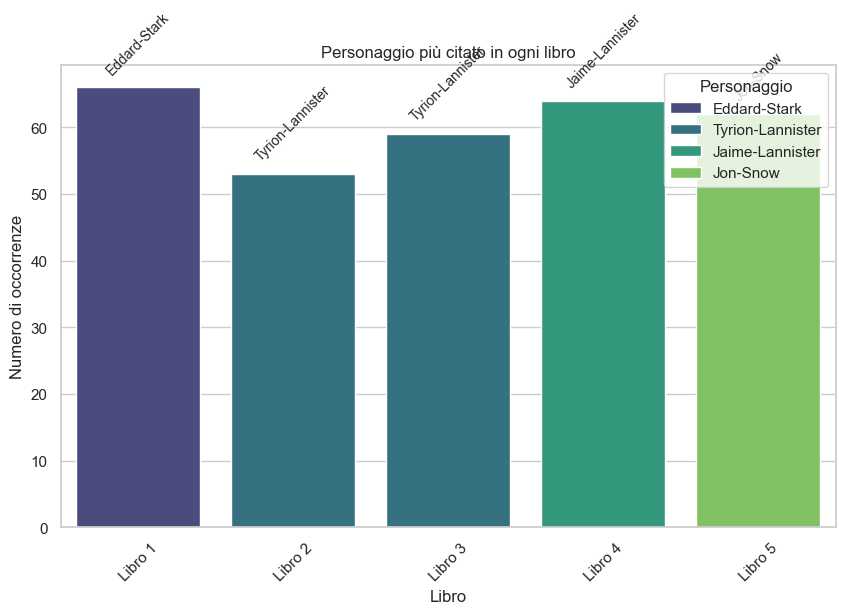

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dei dataset dei libri
book_fnames = ['csv/book1.csv', 'csv/book2.csv', 'csv/book3.csv', 'csv/book4.csv', 'csv/book5.csv']
book_titles = ["Libro 1", "Libro 2", "Libro 3", "Libro 4", "Libro 5"]
top_characters = {}

for book_fname, title in zip(book_fnames, book_titles):
    book = pd.read_csv(book_fname)

    # Contiamo le occorrenze dei personaggi come 'Source' e 'Target'
    character_counts = pd.concat([book['Source'], book['Target']]).value_counts()

    # Troviamo il personaggio più citato
    top_character = character_counts.idxmax()
    top_count = character_counts.max()

    # Salviamo il personaggio più citato per il libro corrente
    top_characters[title] = (top_character, top_count)

# Creazione del DataFrame per la visualizzazione
df_top = pd.DataFrame(top_characters).T.reset_index()
df_top.columns = ["Libro", "Personaggio", "Occorrenze"]

# Creazione del grafico
plt.figure(figsize=(10, 6))
sns.barplot(x="Libro", y="Occorrenze", hue="Personaggio", data=df_top, dodge=False, palette="viridis")

# Aggiunta dei valori sulle barre
for index, row in df_top.iterrows():
    plt.text(index, row.Occorrenze + 2, row.Personaggio, ha='center', fontsize=10, rotation=45)

plt.title("Personaggio più citato in ogni libro")
plt.xlabel("Libro")
plt.ylabel("Numero di occorrenze")
plt.xticks(rotation=45)
plt.legend(title="Personaggio", loc="upper right")
plt.show()


In [9]:
pos = nx.spring_layout(G, k=0.5, iterations=100)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [40]:
import plotly.graph_objs as go

In [41]:
# edge_trace = go.Scatter(
#     x=[],
#     y=[],
#     line=dict(width=0.5, color='#888'),
#     hoverinfo='none',
#     mode='lines')
# for edge in G.edges():
#     x0, y0 = G.nodes[edge[0]]['pos']
#     x1, y1 = G.nodes[edge[1]]['pos']
#     edge_trace['x'] += tuple([x0, x1, None])
#     edge_trace['y'] += tuple([y0, y1, None])

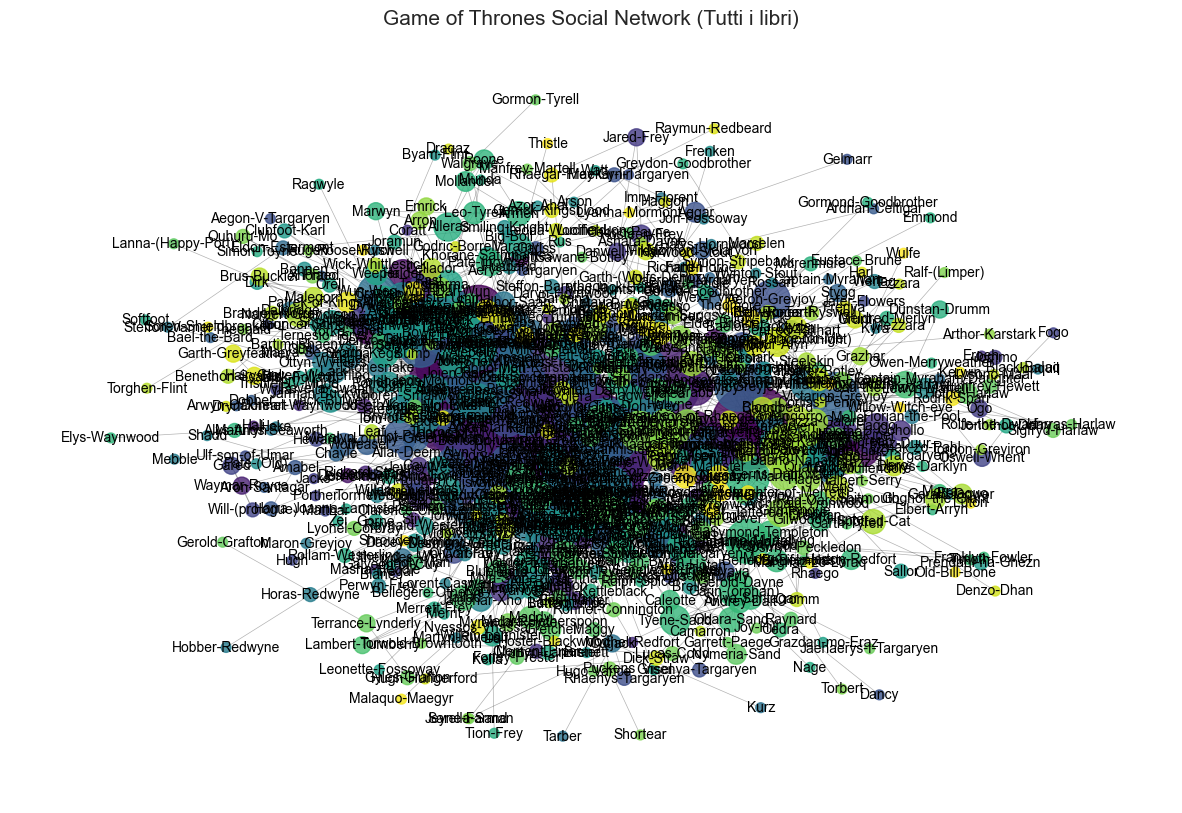

In [53]:
from matplotlib import pyplot as plt
# Layout per la disposizione dei nodi
pos = nx.spring_layout(G, k=0.3, seed=42)

# Disegno dei nodi con grandezza proporzionale al grado
node_sizes = [G.degree(n) * 50 for n in G.nodes()]
node_colors = range(len(G.nodes()))

plt.figure(figsize=(15, 10))
sns.set_style("white")

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.viridis, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Game of Thrones Social Network (Tutti i libri)", fontsize=15)
plt.axis("off")
plt.show()

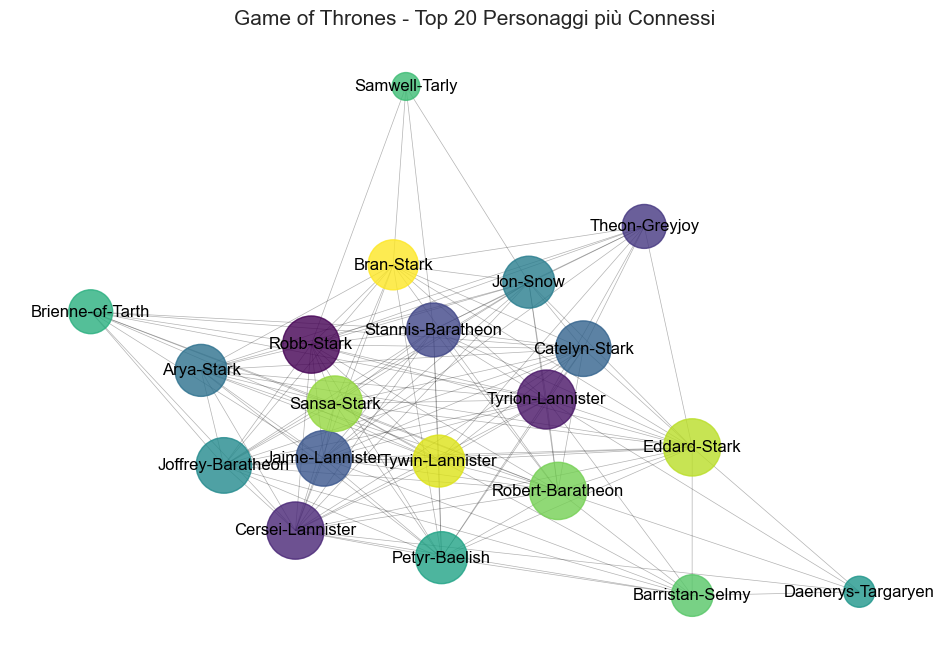

In [54]:


# Ordiniamo i nodi in base al grado (dal più connesso al meno connesso)
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:20]
top_nodes = {n for n, _ in top_nodes}  # Estrai solo i nomi dei nodi

# Creiamo un sottografo con solo i 20 nodi più connessi
G_top = G.subgraph(top_nodes)

# Layout per la disposizione dei nodi
pos = nx.spring_layout(G_top, k=0.3, seed=42)

# Disegno dei nodi con grandezza proporzionale al grado
node_sizes = [G_top.degree(n) * 100 for n in G_top.nodes()]
node_colors = range(len(G_top.nodes()))

plt.figure(figsize=(12, 8))
sns.set_style("white")

nx.draw_networkx_nodes(G_top, pos, node_size=node_sizes, cmap=plt.cm.viridis, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G_top, pos, alpha=0.3, width=0.5)
nx.draw_networkx_labels(G_top, pos, font_size=12, font_color="black")

plt.title("Game of Thrones - Top 20 Personaggi più Connessi", fontsize=15)
plt.axis("off")
plt.show()

In [15]:
# Calcolo del Clustering Coefficient medio per l'intero grafo
clustering_coefficients = nx.clustering(G)
average_clustering = sum(clustering_coefficients.values()) / len(clustering_coefficients)

# Calcolo della periferia
eccentricity = nx.eccentricity(G)
diameter = nx.diameter(G)  # diametro del grafo
periphery = [node for node, ecc in eccentricity.items() if ecc == diameter]

# Verifica della connessione del grafo
is_connected = nx.is_connected(G)
n=len(G.nodes)
m=len(G.edges)
print("Nodi:",n)
print("Archi:",m)
d= m/((n*(n-1))/2)
print("Density:",d)
avr=sum(book1['weight'])/len(book1['weight'])
print("Avarage Lenght:",avr)
# Stampa dei risultati
print(f"Clustering: {average_clustering:.3f}")
print(f"Periferia: {periphery}")
print(f"IS Connect: {is_connected}")

Nodi: 796
Archi: 2823
Density: 0.008921968332227173
Avarage Lenght: 10.769005847953217
Clustering: 0.486
Periferia: ['Murch', 'Simon-Toyne', 'Gerold-Grafton', 'Gormon-Tyrell', 'Torwold-Browntooth', 'Manfrey-Martell', 'Lucifer-Long', 'Hugh-Hungerford']
IS Connect: True


In [10]:
from tabulate import tabulate

# Ordinare gli archi per peso
strongest_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Creare una lista di righe per la tabella
table_data = [(u, v, data['weight']) for u, v, data in strongest_edges[:10]]

# Stampare la tabella
print(tabulate(table_data, headers=["Nodo 1", "Nodo 2", "Peso"], tablefmt="grid"))


+--------------------+-------------------+--------+
| Nodo 1             | Nodo 2            |   Peso |
+====================+===================+========+
| Daenerys-Targaryen | Hizdahr-zo-Loraq  |     96 |
+--------------------+-------------------+--------+
| Theon-Greyjoy      | Ramsay-Snow       |     87 |
+--------------------+-------------------+--------+
| Daenerys-Targaryen | Barristan-Selmy   |     75 |
+--------------------+-------------------+--------+
| Jon-Snow           | Stannis-Baratheon |     73 |
+--------------------+-------------------+--------+
| Tyrion-Lannister   | Penny             |     59 |
+--------------------+-------------------+--------+
| Daenerys-Targaryen | Quentyn-Martell   |     58 |
+--------------------+-------------------+--------+
| Jon-Snow           | Tyrion-Lannister  |     56 |
+--------------------+-------------------+--------+
| Tyrion-Lannister   | Haldon            |     54 |
+--------------------+-------------------+--------+
| Bran-Stark

In [119]:
# Ordinare gli archi per peso
strongest_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Visualizzare i primi 5 archi più forti
print("Top 10 archi più forti:", strongest_edges[:10])


Top 5 archi più forti: [('Daenerys-Targaryen', 'Hizdahr-zo-Loraq', {'weight': 96}), ('Theon-Greyjoy', 'Ramsay-Snow', {'weight': 87}), ('Daenerys-Targaryen', 'Barristan-Selmy', {'weight': 75}), ('Jon-Snow', 'Stannis-Baratheon', {'weight': 73}), ('Tyrion-Lannister', 'Penny', {'weight': 59})]


In [120]:
# Calcolare il cammino più breve tra due nodi
shortest_path = nx.shortest_path(G, source='Jon-Snow', target='Daenerys-Targaryen')
print(f"Cammino più breve tra Jon Snow e Daenerys: {shortest_path}")

Cammino più breve tra Jon Snow e Daenerys: ['Jon-Snow', 'Eddard-Stark', 'Daenerys-Targaryen']


In [125]:
# Trova i ponti (edges che connettono componenti separate)
bridges = list(nx.bridges(G))
print("Ponti nel grafo:", bridges)


Ponti nel grafo: [('Jaime-Lannister', 'Aemon-Targaryen-(Dragonknight)'), ('Jaime-Lannister', 'Urswyck'), ('Jaime-Lannister', 'Bonifer-Hasty'), ('Jaime-Lannister', 'Garrett-Paege'), ('Jaime-Lannister', 'Hugo-Vance'), ('Jaime-Lannister', 'Joy-Hill'), ('Jaime-Lannister', 'Lewys-Piper'), ('Jaime-Lannister', 'Rennifer-Longwaters'), ('Jaime-Lannister', 'Shitmouth'), ('Jaime-Lannister', 'Hoster-Blackwood'), ('Tywin-Lannister', 'Joanna-Lannister'), ('Daenerys-Targaryen', 'Eroeh'), ('Daenerys-Targaryen', 'Lynesse-Hightower'), ('Daenerys-Targaryen', 'Quaithe'), ('Daenerys-Targaryen', 'Rhaegel-Targaryen'), ('Daenerys-Targaryen', 'Barsena'), ('Daenerys-Targaryen', 'Ezzara'), ('Daenerys-Targaryen', 'Lysono-Maar'), ('Daenerys-Targaryen', 'Yurkhaz-zo-Yunzak'), ('Eddard-Stark', 'Jacks'), ('Eddard-Stark', 'Joss'), ('Eddard-Stark', 'Porther'), ('Eddard-Stark', 'Tobho-Mott'), ('Eddard-Stark', 'Tregar'), ('Eddard-Stark', 'Varly'), ('Eddard-Stark', 'Wylla'), ('Eddard-Stark', 'Maron-Greyjoy'), ('Aemon-Targa

In [55]:
deg_cen_book1 = nx.degree_centrality(books[0])

deg_cen_book5 = nx.degree_centrality(books[4])

sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Tyrion-Lannister', 0.15345911949685534), ('Jon-Snow', 0.14339622641509434), ('Jaime-Lannister', 0.1270440251572327), ('Cersei-Lannister', 0.1220125786163522), ('Stannis-Baratheon', 0.11194968553459118), ('Arya-Stark', 0.10566037735849056), ('Catelyn-Stark', 0.09433962264150943), ('Sansa-Stark', 0.09433962264150943), ('Eddard-Stark', 0.0930817610062893), ('Robb-Stark', 0.0930817610062893)]
[]


In [16]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([(start, 0)])

    while queue:
        node, distance = queue.popleft()

        if node not in visited:
            visited.add(node)

            for neighbor in graph[node]:
                queue.append((neighbor, distance + 1))

    return node, distance

def find_diameter(graph):
    max_distance = -1
    farthest_node = None

    for node in graph:
        _, distance = bfs(graph, node)

        if distance > max_distance:
            max_distance = distance
            farthest_node = node

    return farthest_node, max_distance

In [60]:
farthest_node, diameter = find_diameter(G)
print(f"Percorso più breve tra i due nodi più lontani: {diameter} (da {farthest_node} a {farthest_node})")

Percorso più breve tra i due nodi più lontani: 10 (da Murch a Murch)


In [61]:
reciprocity = nx.reciprocity(G)
print(f"Reciprocity: {reciprocity}")

Reciprocity: 0.0


In [62]:
transitivity = nx.transitivity(G)
print(f"Transitivity: {transitivity}")

Transitivity: 0.2090366938564282


In [63]:
x=[d,avr,diameter,reciprocity,transitivity]

In [64]:
x

[0.008921968332227173, 10.769005847953217, 10, 0.0, 0.2090366938564282]

In [17]:
# Calcolo della Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Ordinare i personaggi in base alla Closeness Centrality (decrescente)
sorted_characters = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Stampare i primi 10 personaggi con Closeness Centrality più alta
print("Top 10 personaggi per Closeness Centrality:")
for rank, (character, centrality) in enumerate(sorted_characters[:10], 1):
    print(f"{rank}. {character}: {centrality:.4f}")

# Stampare gli ultimi 10 personaggi con Closeness Centrality più bassa
print("\nUltimi 10 personaggi per Closeness Centrality:")
for rank, (character, centrality) in enumerate(sorted_characters[-10:], 1):
    print(f"{len(sorted_characters)-10+rank}. {character}: {centrality:.4f}")

Top 10 personaggi per Closeness Centrality:
1. Tyrion-Lannister: 0.4763
2. Robert-Baratheon: 0.4593
3. Eddard-Stark: 0.4558
4. Cersei-Lannister: 0.4545
5. Jaime-Lannister: 0.4520
6. Jon-Snow: 0.4454
7. Stannis-Baratheon: 0.4446
8. Robb-Stark: 0.4441
9. Joffrey-Baratheon: 0.4340
10. Catelyn-Stark: 0.4335

Ultimi 10 personaggi per Closeness Centrality:
787. Lucifer-Long: 0.1871
788. Manfrey-Martell: 0.1858
789. Hugh-Hungerford: 0.1797
790. Simon-Toyne: 0.1786
791. Walgrave: 0.1771
792. Quill: 0.1771
793. Rosey: 0.1771
794. Murch: 0.1751
795. Torwold-Browntooth: 0.1717
796. Gormon-Tyrell: 0.1505


In [18]:
# Creare un DataFrame per i primi 10 e gli ultimi 10 personaggi
top_10 = pd.DataFrame(sorted_characters[:10], columns=['Personaggio', 'Closeness Centrality'])
bottom_10 = pd.DataFrame(sorted_characters[-10:], columns=['Personaggio', 'Closeness Centrality'])

# Visualizzazione affiancata
from IPython.display import display, HTML

display(HTML(top_10.to_html(index=True, border=1)))
display(HTML(bottom_10.to_html(index=True, border=1)))

,Personaggio,Closeness Centrality
0,Tyrion-Lannister,0.476333
1,Robert-Baratheon,0.459272
2,Eddard-Stark,0.455849
3,Cersei-Lannister,0.454545
4,Jaime-Lannister,0.451961
5,Jon-Snow,0.445378
6,Stannis-Baratheon,0.444631
7,Robb-Stark,0.444134
8,Joffrey-Baratheon,0.433952
9,Catelyn-Stark,0.433479


,Personaggio,Closeness Centrality
0,Lucifer-Long,0.187103
1,Manfrey-Martell,0.185835
2,Hugh-Hungerford,0.179742
3,Simon-Toyne,0.178571
4,Walgrave,0.177139
5,Quill,0.177060
6,Rosey,0.177060
7,Murch,0.175072
8,Torwold-Browntooth,0.171743
9,Gormon-Tyrell,0.150511


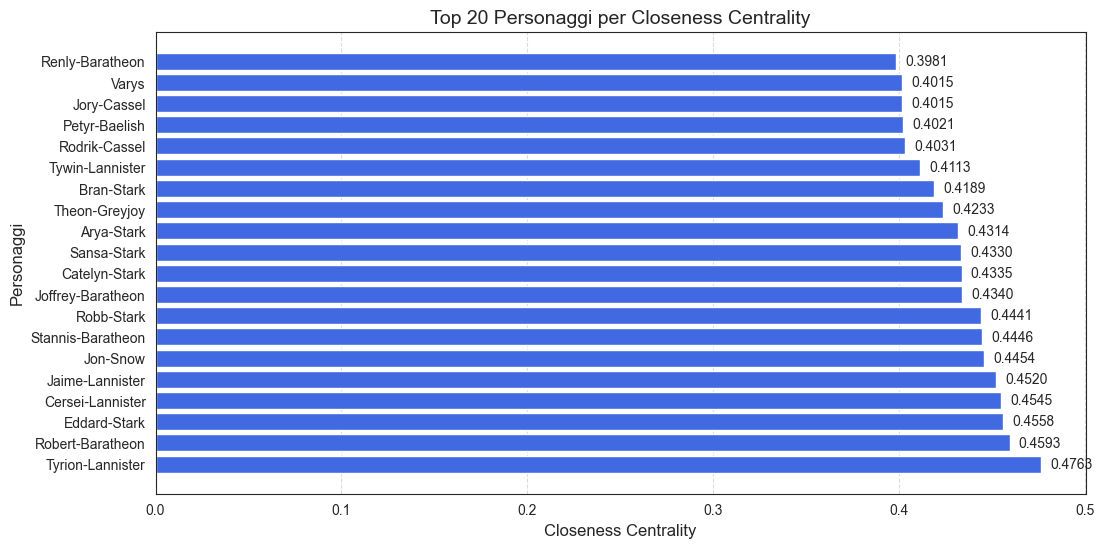

In [70]:
sorted_characters = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_20_characters = sorted_characters[:20]
# **Estrazione dei nomi e dei valori**
names = [char[0] for char in top_20_characters]
values = [char[1] for char in top_20_characters]
# **Creazione del grafico a barre**
plt.figure(figsize=(12, 6))
plt.barh(names[::-1], values[::-1], color='royalblue')  # Invertiamo la lista per avere il primo in alto
plt.xlabel("Closeness Centrality", fontsize=12)
plt.ylabel("Personaggi", fontsize=12)
plt.title("Top 20 Personaggi per Closeness Centrality", fontsize=14)
plt.gca().invert_yaxis()  # Invertire l'asse y per avere il primo in alto
plt.grid(axis='x', linestyle='--', alpha=0.7)

# **Mostrare il valore su ogni barra**
for i, v in enumerate(values[::-1]):
    plt.text(v + 0.005, i, f"{v:.4f}", va='center', fontsize=10)

# **Mostrare il grafico**
plt.show()

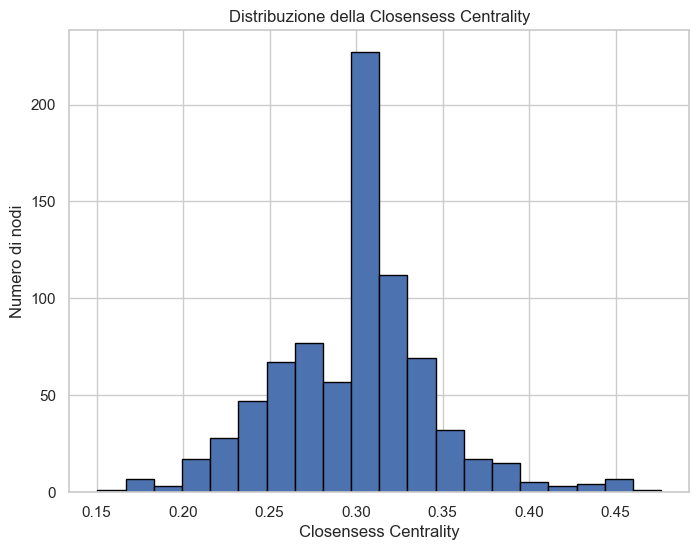

In [21]:
# Calcoliamo la degree centrality per ogni nodo
closeness_centrality = nx.closeness_centrality(G)

# Estraiamo i valori di degree centrality
centrality_values = list(closeness_centrality.values())

# Creiamo l'istogramma della distribuzione della degree centrality
plt.figure(figsize=(8, 6))
plt.hist(centrality_values, bins=20, edgecolor='black')
plt.title('Distribuzione della Closensess Centrality')
plt.xlabel('Closensess Centrality')
plt.ylabel('Numero di nodi')
plt.grid(True)
plt.show()

In [10]:
import matplotlib.colors as mcolors

def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

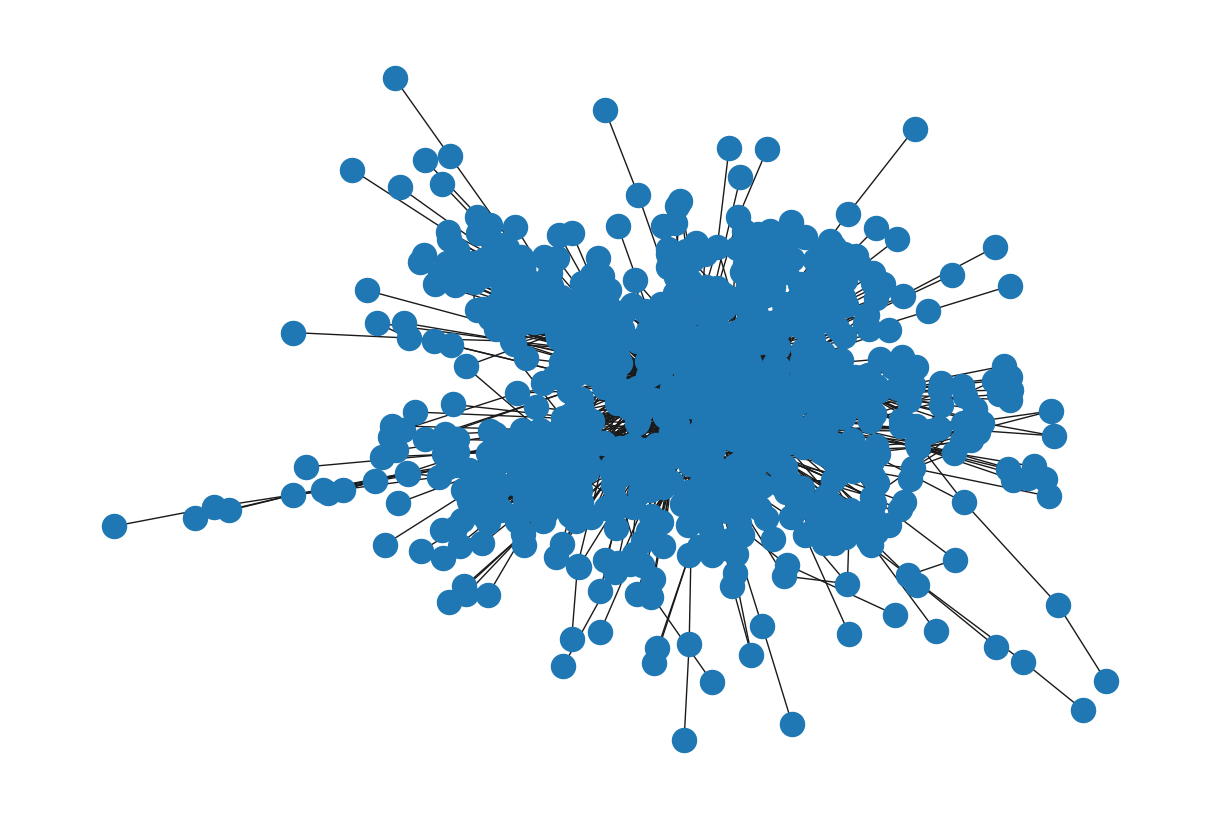

In [35]:
# visualize the graph
# todo define different methods of visualization
plt.figure(figsize=(12,8))
nx.draw(G)

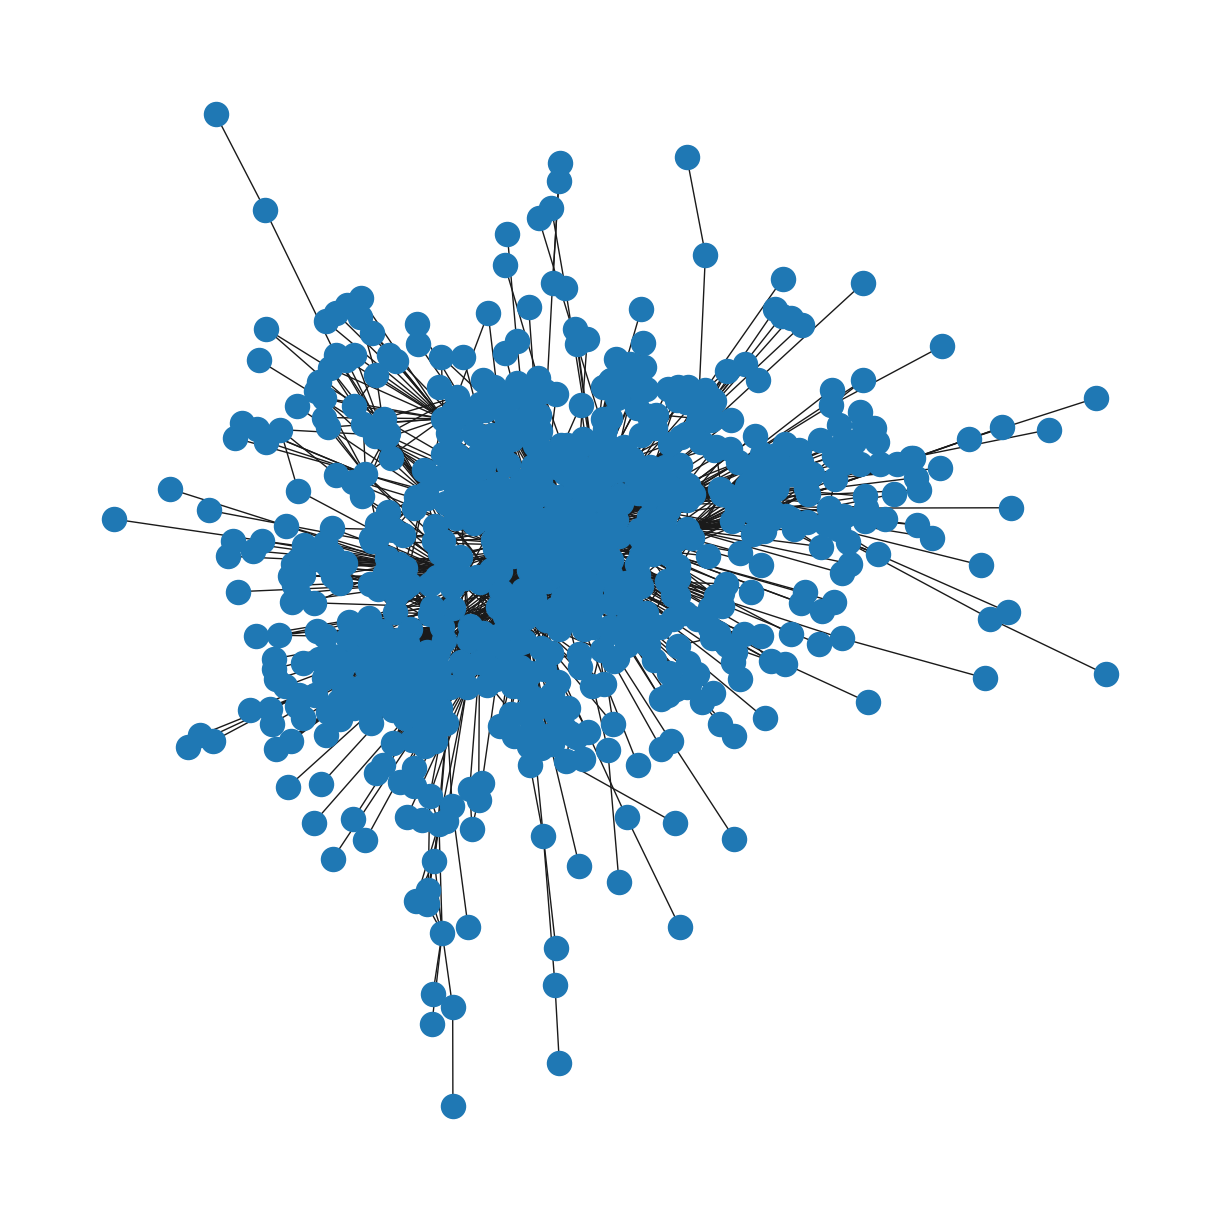

In [36]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(G)
pos_s= nx.spring_layout(G)
nx.draw(G, pos_s)

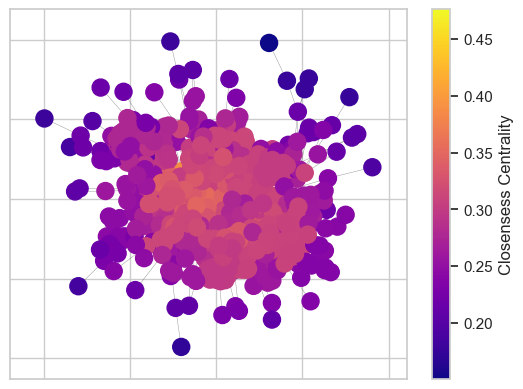

In [11]:
closeness_centrality = nx.closeness_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(closeness_centrality.values()),
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Closensess Centrality")
plt.show()

In [39]:
eigenvector_centrality = nx.eigenvector_centrality(G)
# **Ordinare i personaggi in base alla Centrality (decrescente)**
sorted_characters_e = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# **Stampare i primi 20 personaggi**
print("Top 20 personaggi con la centralità degli autovettori per ogni nodo nel grafo:")
for rank, (character, centrality) in enumerate(sorted_characters[:10], 1):
    print(f"{rank}. {character}: {centrality:.4f}")


Top 20 personaggi con la centralità degli autovettori per ogni nodo nel grafo:
1. Tyrion-Lannister: 0.4763
2. Robert-Baratheon: 0.4593
3. Eddard-Stark: 0.4558
4. Cersei-Lannister: 0.4545
5. Jaime-Lannister: 0.4520
6. Jon-Snow: 0.4454
7. Stannis-Baratheon: 0.4446
8. Robb-Stark: 0.4441
9. Joffrey-Baratheon: 0.4340
10. Catelyn-Stark: 0.4335


In [54]:
# Creare un DataFrame per i primi 10 e gli ultimi 10 personaggi
top_10 = pd.DataFrame(sorted_characters_e[:10], columns=['Personaggio', 'Eigenvector Centrality'])
bottom_10 = pd.DataFrame(sorted_characters_e[-10:], columns=['Personaggio', 'Eigenvector Centrality'])

# Visualizzazione affiancata
from IPython.display import display, HTML

display(HTML(top_10.to_html(index=True, border=1)))
display(HTML(bottom_10.to_html(index=True, border=1)))

,Personaggio,Eigenvector Centrality
0,Tyrion-Lannister,0.251558
1,Cersei-Lannister,0.235771
2,Jaime-Lannister,0.226339
3,Joffrey-Baratheon,0.214376
4,Sansa-Stark,0.205842
5,Robert-Baratheon,0.194375
6,Eddard-Stark,0.191660
7,Stannis-Baratheon,0.182085
8,Catelyn-Stark,0.175886
9,Robb-Stark,0.173196


,Personaggio,Eigenvector Centrality
0,Manfrey-Martell,1.506822e-05
1,Steffon-Varner,1.479516e-05
2,Simon-Toyne,6.597588e-06
3,Walgrave,6.125952e-06
4,Quill,6.118404e-06
5,Rosey,6.118404e-06
6,Hugh-Hungerford,3.895174e-06
7,Murch,2.041418e-06
8,Torwold-Browntooth,1.278353e-06
9,Gormon-Tyrell,2.148365e-07


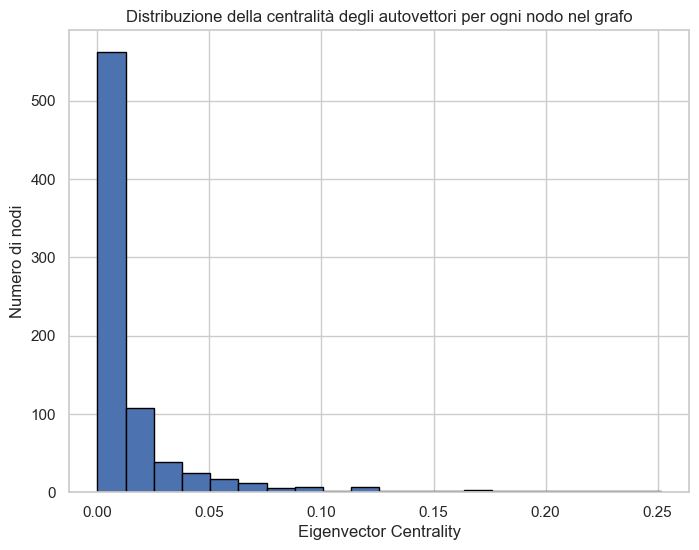

In [47]:
# Calcoliamo la degree centrality per ogni nodo
eigenvector_centrality = nx.eigenvector_centrality(G)

# Estraiamo i valori di degree centrality
eigenvector_centrality = list(eigenvector_centrality.values())

# Creiamo l'istogramma della distribuzione della degree centrality
plt.figure(figsize=(8, 6))
plt.hist(eigenvector_centrality, bins=20, edgecolor='black')
plt.title('Distribuzione della centralità degli autovettori per ogni nodo nel grafo')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Numero di nodi')
plt.grid(True)
plt.show()

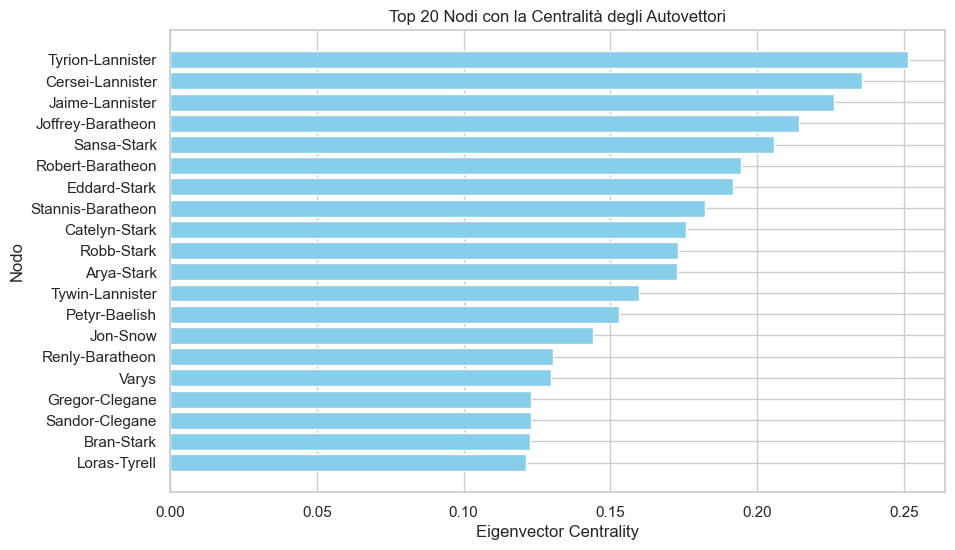

In [51]:
# Calcoliamo la Eigenvector Centrality per ogni nodo
eigenvector_centrality = nx.eigenvector_centrality(G)

# Ordinare i nodi in base alla centralità (decrescente)
sorted_characters_e = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Prendiamo i primi 20 nodi con la centralità più alta
top_20_characters = sorted_characters_e[:20]

# Separiamo i nodi e i valori di centralità
nodes, centrality_values = zip(*top_20_characters)

# Creiamo il grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nodo')
plt.title('Top 20 Nodi con la Centralità degli Autovettori')
plt.gca().invert_yaxis()  # Invertiamo l'asse y per avere il nodo con la centralità più alta in cima
plt.show()

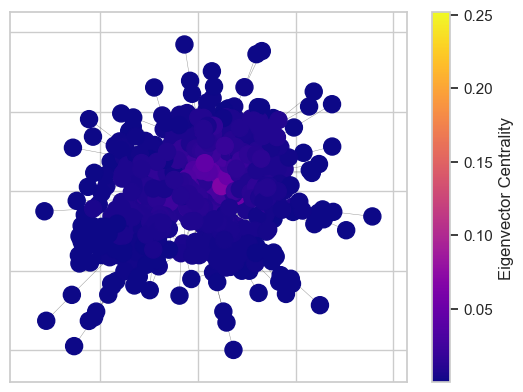

In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(eigenvector_centrality.values()),
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Eigenvector Centrality")
plt.show()

In [42]:
betweenness_centrality = nx.betweenness_centrality(G)
# **Ordinare i personaggi in base alla Centrality d'intermediazione  (decrescente)**
sorted_characters_b = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# **Stampare i primi 20 personaggi**
print("Top 20 personaggi con la centralità d'intermediazione:")
for rank, (character, centrality) in enumerate(sorted_characters[:20], 1):
    print(f"{rank}. {character}: {centrality:.4f}")

Top 20 personaggi con la centralità d'intermediazione:
1. Tyrion-Lannister: 0.4763
2. Robert-Baratheon: 0.4593
3. Eddard-Stark: 0.4558
4. Cersei-Lannister: 0.4545
5. Jaime-Lannister: 0.4520
6. Jon-Snow: 0.4454
7. Stannis-Baratheon: 0.4446
8. Robb-Stark: 0.4441
9. Joffrey-Baratheon: 0.4340
10. Catelyn-Stark: 0.4335
11. Sansa-Stark: 0.4330
12. Arya-Stark: 0.4314
13. Theon-Greyjoy: 0.4233
14. Bran-Stark: 0.4189
15. Tywin-Lannister: 0.4113
16. Rodrik-Cassel: 0.4031
17. Petyr-Baelish: 0.4021
18. Jory-Cassel: 0.4015
19. Varys: 0.4015
20. Renly-Baratheon: 0.3981


In [53]:
# Creare un DataFrame per i primi 10 e gli ultimi 10 personaggi
top_10 = pd.DataFrame(sorted_characters_b[:10], columns=['Personaggio', 'Betweenness Centrality'])
bottom_10 = pd.DataFrame(sorted_characters_b[-10:], columns=['Personaggio', 'Betweenness Centrality'])

# Visualizzazione affiancata
from IPython.display import display, HTML

display(HTML(top_10.to_html(index=True, border=1)))
display(HTML(bottom_10.to_html(index=True, border=1)))

,Personaggio,Betweenness Centrality
0,Jon-Snow,0.192120
1,Tyrion-Lannister,0.162191
2,Daenerys-Targaryen,0.118418
3,Theon-Greyjoy,0.111283
4,Stannis-Baratheon,0.110140
5,Jaime-Lannister,0.100838
6,Cersei-Lannister,0.088704
7,Arya-Stark,0.087242
8,Eddard-Stark,0.078732
9,Robert-Baratheon,0.078228


,Personaggio,Betweenness Centrality
0,Yellow-Dick,0.0
1,Walda-Frey-(daughter-of-Merrett),0.0
2,Roose-Ryswell,0.0
3,Scar,0.0
4,Shrouded-Lord,0.0
5,Theomore,0.0
6,William-Foxglove,0.0
7,Willow-Witch-eye,0.0
8,Thistle,0.0
9,Wulfe,0.0


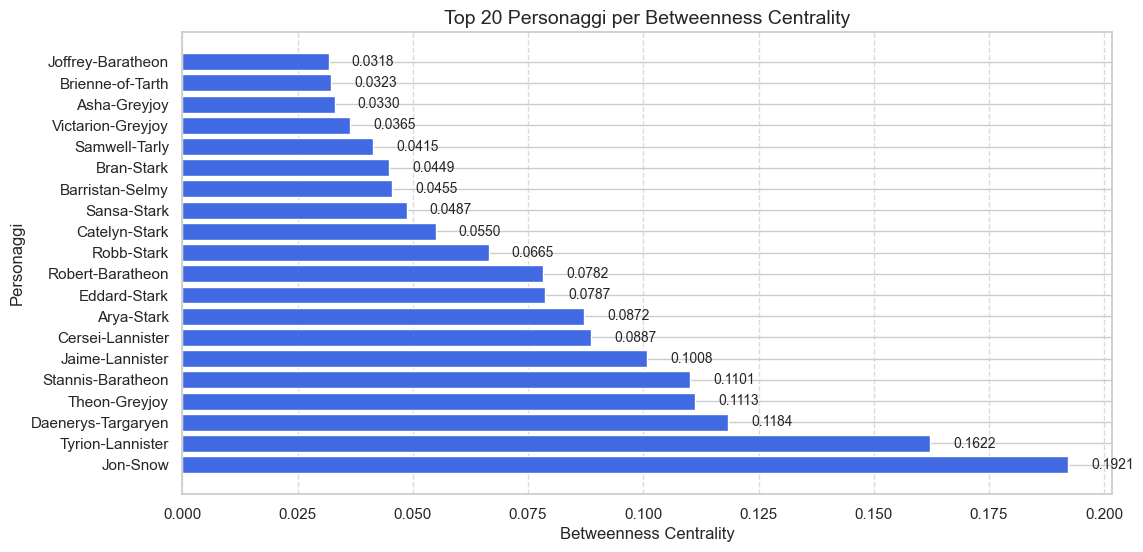

In [55]:
sorted_characters = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_20_characters = sorted_characters[:20]
# **Estrazione dei nomi e dei valori**
names = [char[0] for char in top_20_characters]
values = [char[1] for char in top_20_characters]
# **Creazione del grafico a barre**
plt.figure(figsize=(12, 6))
plt.barh(names[::-1], values[::-1], color='royalblue')  # Invertiamo la lista per avere il primo in alto
plt.xlabel("Betweenness Centrality", fontsize=12)
plt.ylabel("Personaggi", fontsize=12)
plt.title("Top 20 Personaggi per Betweenness Centrality", fontsize=14)
plt.gca().invert_yaxis()  # Invertire l'asse y per avere il primo in alto
plt.grid(axis='x', linestyle='--', alpha=0.7)

# **Mostrare il valore su ogni barra**
for i, v in enumerate(values[::-1]):
    plt.text(v + 0.005, i, f"{v:.4f}", va='center', fontsize=10)

# **Mostrare il grafico**
plt.show()

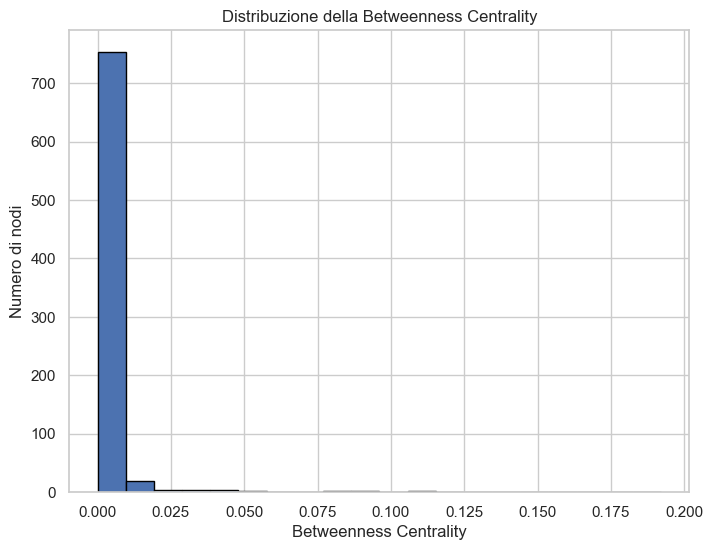

In [56]:
# Calcoliamo la degree centrality per ogni nodo
betweenness_centrality = nx.betweenness_centrality(G)

# Estraiamo i valori di degree centrality
betweenness_centrality = list(betweenness_centrality.values())

# Creiamo l'istogramma della distribuzione della degree centrality
plt.figure(figsize=(8, 6))
plt.hist(betweenness_centrality, bins=20, edgecolor='black')
plt.title('Distribuzione della Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Numero di nodi')
plt.grid(True)
plt.show()

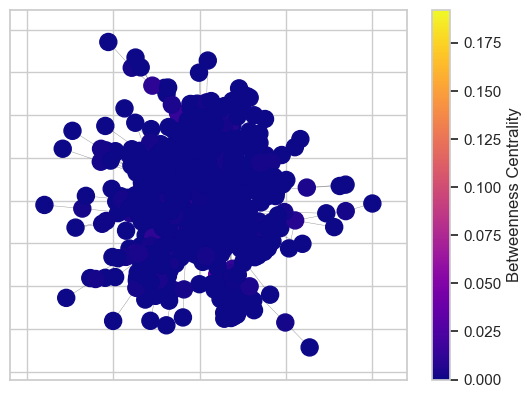

In [13]:
betweenness_centrality = nx.betweenness_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(betweenness_centrality.values()),
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Betweenness Centrality")
plt.show()

In [18]:
# Calcolo della Closeness Centrality
degree_centrality = nx.degree_centrality(G)

# Ordinare i personaggi in base alla Closeness Centrality (decrescente)
sorted_characters_dc = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)



In [20]:
# Creare un DataFrame per i primi 10 e gli ultimi 10 personaggi
top_10 = pd.DataFrame(sorted_characters_dc[:10], columns=['Personaggio', 'Degree Centrality'])
bottom_10 = pd.DataFrame(sorted_characters_dc[-10:], columns=['Personaggio', 'Degree Centrality'])

# Visualizzazione affiancata
from IPython.display import display, HTML

display(HTML(top_10.to_html(index=True, border=1)))
display(HTML(bottom_10.to_html(index=True, border=1)))

,Personaggio,Degree Centrality
0,Tyrion-Lannister,0.153459
1,Jon-Snow,0.143396
2,Jaime-Lannister,0.127044
3,Cersei-Lannister,0.122013
4,Stannis-Baratheon,0.111950
5,Arya-Stark,0.105660
6,Catelyn-Stark,0.094340
7,Sansa-Stark,0.094340
8,Eddard-Stark,0.093082
9,Robb-Stark,0.093082


,Personaggio,Degree Centrality
0,Lyanna-Mormont,0.001258
1,Malaquo-Maegyr,0.001258
2,Morgo,0.001258
3,Old-Bill-Bone,0.001258
4,Roose-Ryswell,0.001258
5,Shrouded-Lord,0.001258
6,William-Foxglove,0.001258
7,Willow-Witch-eye,0.001258
8,Thistle,0.001258
9,Wulfe,0.001258


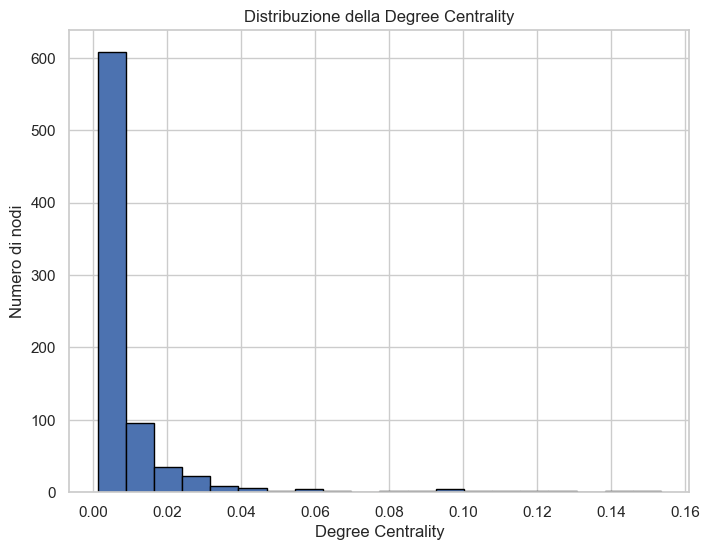

In [14]:
# Calcoliamo la degree centrality per ogni nodo
degree_centrality = nx.degree_centrality(G)

# Estraiamo i valori di degree centrality
degree_centrality = list(degree_centrality.values())

# Creiamo l'istogramma della distribuzione della degree centrality
plt.figure(figsize=(8, 6))
plt.hist(degree_centrality, bins=20, edgecolor='black')
plt.title('Distribuzione della Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Numero di nodi')
plt.grid(True)
plt.show()

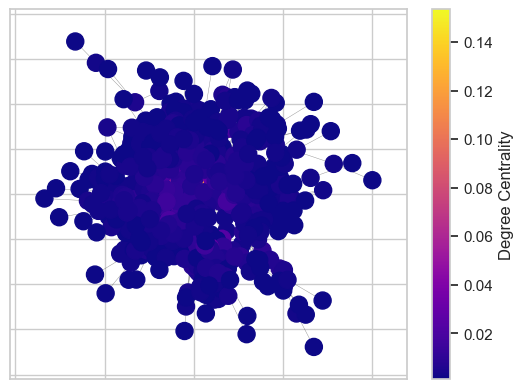

In [22]:
degree_centrality = nx.degree_centrality(G)
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(degree_centrality.values()),
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Degree Centrality")
plt.show()

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Rilevamento delle comunità con il metodo di Girvan-Newman
communities = list(nx.algorithms.community.girvan_newman(G))

# Visualizza le comunità in modo grafico
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout per il grafico

# Colora i nodi in base alla comunità a cui appartengono
community_colors = []
for community in communities[0]:  # prendi la prima suddivisione delle comunità
    for node in community:
        community_colors.append(node)

# Disegna il grafico del grafo
nx.draw(G, pos, with_labels=True, node_size=500, node_color=community_colors, cmap=plt.cm.rainbow, font_size=10)
plt.title("Rilevamento delle Comunità con il Metodo di Girvan-Newman")
plt.show()


KeyboardInterrupt: 

In [16]:
from networkx.algorithms.community import modularity
# Rilevamento delle comunità con il metodo di Girvan-Newman
communities = list(nx.algorithms.community.girvan_newman(G))
modularity_score = modularity(G, communities[0])  # Usa la prima suddivisione delle comunità
print(f"Modularità della suddivisione: {modularity_score}")


KeyboardInterrupt: 

In [12]:
diameter = nx.diameter(G)
print(f"Diametro del grafo: {diameter}")

Diametro del grafo: 9


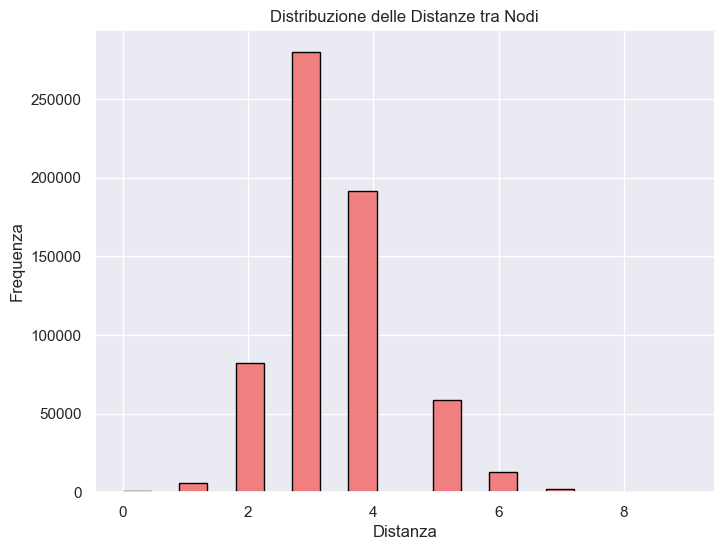

In [13]:
all_pairs_shortest_path = dict(nx.all_pairs_shortest_path_length(G))
distances = [length for node in all_pairs_shortest_path for length in all_pairs_shortest_path[node].values()]

plt.figure(figsize=(8, 6))
plt.hist(distances, bins=20, color='lightcoral', edgecolor='black')
plt.title("Distribuzione delle Distanze tra Nodi")
plt.xlabel("Distanza")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()


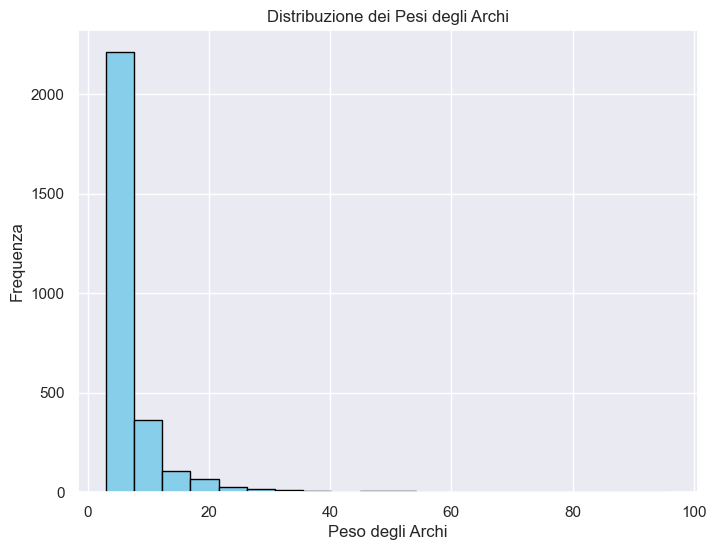

In [14]:
# Calcola la distribuzione dei pesi degli archi
edge_weights = nx.get_edge_attributes(G, 'weight')

# Estrai i pesi in una lista
weights = list(edge_weights.values())

# Visualizza la distribuzione dei pesi degli archi tramite un istogramma
plt.figure(figsize=(8, 6))
plt.hist(weights, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuzione dei Pesi degli Archi")
plt.xlabel("Peso degli Archi")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()

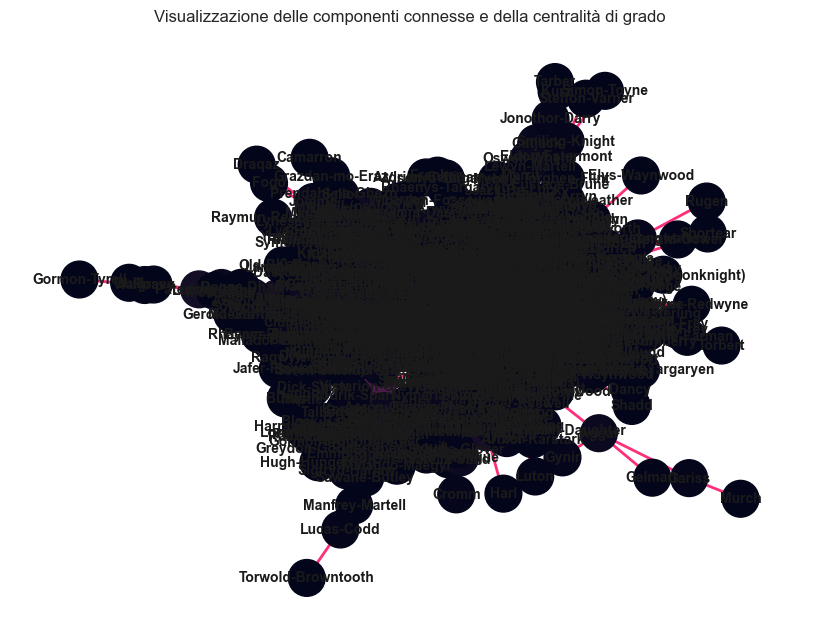

In [9]:
# Trova le componenti connesse
connected_components = list(nx.connected_components(G))

# Impostazioni per la visualizzazione
plt.figure(figsize=(8, 6))

# Disegnare il grafo con colori per centralità
pos = nx.spring_layout(G)  # Posizioni dei nodi
degree_centrality = nx.degree_centrality(G)  # Centralità di grado

# Assegna un colore per centralità (colore più scuro = maggiore centralità)
node_color = [degree_centrality[node] for node in G.nodes()]

# Disegna il grafo con colori e raggruppa per componenti
for component in connected_components:
    subgraph = G.subgraph(component)
    # Assegna un colore casuale a ciascun gruppo per distinguerli visivamente
    color_map = np.random.rand(3,)  # Un colore random
    nx.draw(subgraph, pos, with_labels=True, node_color=node_color,
            edge_color=[color_map for _ in subgraph.edges()],
            node_size=700, font_size=10, font_weight='bold', width=2)

# Mostra il grafico
plt.title("Visualizzazione delle componenti connesse e della centralità di grado")
plt.show()

In [15]:
# Scegliere i due personaggi da esaminare
personaggio_1 = 'Jon-Snow'
personaggio_2 = 'Tyrion-Lannister'

# Trovare i nodi comuni che sono connessi sia al personaggio_1 che al personaggio_2
comuni = set(G.neighbors(personaggio_1)) & set(G.neighbors(personaggio_2))

# Calcolare il numero di triadi
num_triadi = len(comuni)
# Visualizzare il numero di triadi
print(f"Numero di triadi in cui {personaggio_1} e {personaggio_2} appaiono insieme: {num_triadi}")

# Visualizzare i risultati
print(f"I nodi comuni tra {personaggio_1} e {personaggio_2} sono: {comuni}")

# Contare quante volte appaiono insieme in una triade
for nodo_comune in comuni:
    triade = (personaggio_1, personaggio_2, nodo_comune)
    print(f"Triade trovata: {triade}")

Numero di triadi in cui Jon-Snow e Tyrion-Lannister appaiono insieme: 20
I nodi comuni tra Jon-Snow e Tyrion-Lannister sono: {'Janos-Slynt', 'Rodrik-Cassel', 'Theon-Greyjoy', 'Benjen-Stark', 'Arya-Stark', 'Jaime-Lannister', 'Eddard-Stark', 'Bran-Stark', 'Robert-Baratheon', 'Stannis-Baratheon', 'Catelyn-Stark', 'Robb-Stark', 'Sansa-Stark', 'Cersei-Lannister', 'Jeor-Mormont', 'Luwin', 'Alliser-Thorne', 'Joffrey-Baratheon', 'Rickon-Stark', 'Yoren'}
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Janos-Slynt')
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Rodrik-Cassel')
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Theon-Greyjoy')
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Benjen-Stark')
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Arya-Stark')
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Jaime-Lannister')
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Eddard-Stark')
Triade trovata: ('Jon-Snow', 'Tyrion-Lannister', 'Bran-Stark')
Triade trovata: ('Jon-Snow', '

In [16]:
# Trovare i nodi comuni che sono connessi sia al personaggio_1 che al personaggio_2
comuni = set(G.neighbors(personaggio_1)) & set(G.neighbors(personaggio_2))

# Calcolare il numero di triadi
num_triadi = len(comuni)

# Creiamo una lista di tuple (personaggio_1, personaggio_2, nodo_comune)
triadi = [(personaggio_1, personaggio_2, nodo_comune) for nodo_comune in comuni]

# Creiamo una tabella con Pandas
df = pd.DataFrame(triadi, columns=['Personaggio 1', 'Personaggio 2', 'Nodo Comune'])

# Visualizzare i risultati
print(f"Numero di triadi in cui {personaggio_1} e {personaggio_2} appaiono insieme: {num_triadi}")
print(f"I nodi comuni tra {personaggio_1} e {personaggio_2} sono: {comuni}")

# Mostriamo la tabella
print("\nTabella delle Triadi:")
print(df)

Numero di triadi in cui Jon-Snow e Tyrion-Lannister appaiono insieme: 20
I nodi comuni tra Jon-Snow e Tyrion-Lannister sono: {'Janos-Slynt', 'Rodrik-Cassel', 'Theon-Greyjoy', 'Benjen-Stark', 'Arya-Stark', 'Jaime-Lannister', 'Eddard-Stark', 'Bran-Stark', 'Robert-Baratheon', 'Stannis-Baratheon', 'Catelyn-Stark', 'Robb-Stark', 'Sansa-Stark', 'Cersei-Lannister', 'Jeor-Mormont', 'Luwin', 'Alliser-Thorne', 'Joffrey-Baratheon', 'Rickon-Stark', 'Yoren'}

Tabella delle Triadi:
   Personaggio 1     Personaggio 2        Nodo Comune
0       Jon-Snow  Tyrion-Lannister        Janos-Slynt
1       Jon-Snow  Tyrion-Lannister      Rodrik-Cassel
2       Jon-Snow  Tyrion-Lannister      Theon-Greyjoy
3       Jon-Snow  Tyrion-Lannister       Benjen-Stark
4       Jon-Snow  Tyrion-Lannister         Arya-Stark
5       Jon-Snow  Tyrion-Lannister    Jaime-Lannister
6       Jon-Snow  Tyrion-Lannister       Eddard-Stark
7       Jon-Snow  Tyrion-Lannister         Bran-Stark
8       Jon-Snow  Tyrion-Lannister   Robe

In [17]:
# Trova tutte le cliques massime
cliques = list(nx.find_cliques(G))

# Filtrare le cliques che contengono entrambi i personaggi
cliques_con_personaggi = [clique for clique in cliques if personaggio_1 in clique and personaggio_2 in clique]

# Visualizzare il numero di cliques e i loro dettagli
print(f"Numero di cliques che contengono sia {personaggio_1} che {personaggio_2}: {len(cliques_con_personaggi)}")
for i, clique in enumerate(cliques_con_personaggi, 1):
    print(f"Clique {i}: {clique}")

Numero di cliques che contengono sia Jon-Snow che Tyrion-Lannister: 20
Clique 1: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Jaime-Lannister', 'Jon-Snow', 'Joffrey-Baratheon']
Clique 2: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Jaime-Lannister', 'Jon-Snow', 'Theon-Greyjoy']
Clique 3: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Bran-Stark', 'Jon-Snow', 'Joffrey-Baratheon']
Clique 4: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Bran-Stark', 'Jon-Snow', 'Rickon-Stark', 'Theon-Greyjoy']
Clique 5: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Luwin', 'Jon-Snow', 'Rickon-Stark', 'Theon-Greyjoy', 'Bran-Stark']
Clique 6: ['Tyrion-Lannister', 'Theon-Greyjoy', 'Robb-Stark', 'Catelyn-Stark', 'Eddard-Stark', 'Stannis-Baratheon', 'Jon-Sno

Numero di cliques massime: 1
Numero di cliques che contengono sia Jon-Snow che Tyrion-Lannister: 0


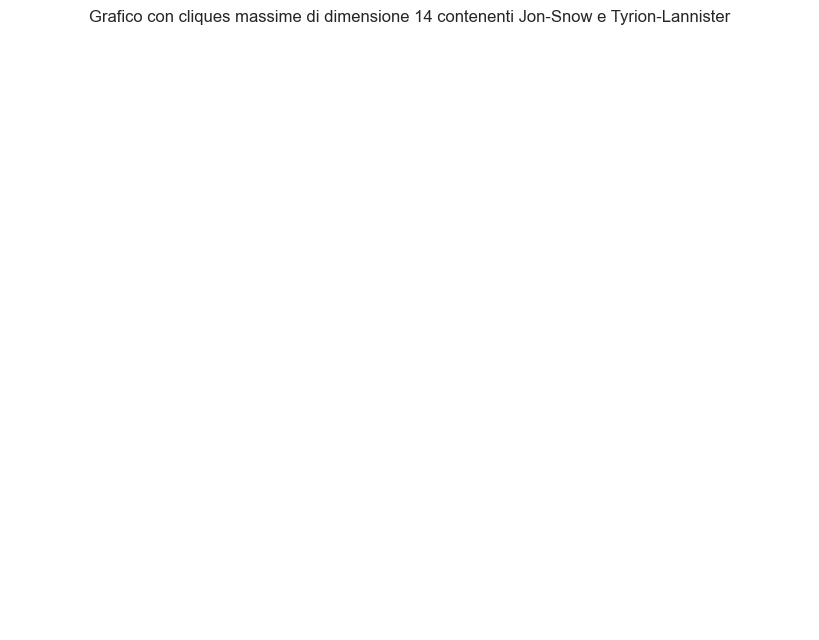

In [19]:
# Trova tutte le cliques massime
cliques_massimali = list(nx.find_cliques(G))

# Determinare la dimensione massima delle cliques
dimensione_massima = max(len(clique) for clique in cliques_massimali)

# Selezionare solo le cliques massime (di dimensione massima)
cliques_massime = [clique for clique in cliques_massimali if len(clique) == dimensione_massima]

# Filtrare le cliques che contengono entrambi i personaggi
cliques_con_personaggi = [clique for clique in cliques_massime if personaggio_1 in clique and personaggio_2 in clique]

# Visualizzare il numero di cliques che contengono i due personaggi e i loro dettagli
print(f"Numero di cliques massime: {len(cliques_massime)}")
print(f"Numero di cliques che contengono sia {personaggio_1} che {personaggio_2}: {len(cliques_con_personaggi)}")

# Mostrare le cliques massime che contengono entrambi i personaggi
for i, clique in enumerate(cliques_con_personaggi, 1):
    print(f"Clique {i}: {clique}")

# Creare un grafo con solo i nodi delle cliques che contengono i due personaggi
nodi_cliques_con_personaggi = set(node for clique in cliques_con_personaggi for node in clique)
G_con_personaggi = G.subgraph(nodi_cliques_con_personaggi)

# Visualizzare il grafo con solo le cliques massime evidenziate
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_con_personaggi)

# Disegnare i nodi del sottografo (solo le cliques che contengono i personaggi)
nx.draw(G_con_personaggi, pos, with_labels=True, node_color='orange', node_size=2000, font_size=12, font_weight='bold')

plt.title(f"Grafico con cliques massime di dimensione {dimensione_massima} contenenti {personaggio_1} e {personaggio_2}")
plt.show()

In [21]:
# Verificare se entrambe i personaggi sono nelle cliques massime
for i, clique in enumerate(cliques_massime, 1):
    print(f"Clique {i}: {clique}")
    print(f"Contiene {personaggio_1}: {personaggio_1 in clique}")
    print(f"Contiene {personaggio_2}: {personaggio_2 in clique}")

Clique 1: ['Tyrion-Lannister', 'Cersei-Lannister', 'Joffrey-Baratheon', 'Sansa-Stark', 'Jaime-Lannister', 'Robert-Baratheon', 'Eddard-Stark', 'Petyr-Baelish', 'Renly-Baratheon', 'Varys', 'Tywin-Lannister', 'Stannis-Baratheon', 'Catelyn-Stark', 'Robb-Stark']
Contiene Jon-Snow: False
Contiene Tyrion-Lannister: True


In [20]:
# Trova tutte le cliques massime nel grafo
cliques = list(nx.find_cliques(G))

# Filtrare le cliques che contengono entrambi i personaggi e hanno almeno 4 nodi
cliques_con_personaggi = [clique for clique in cliques if personaggio_1 in clique and personaggio_2 in clique and len(clique) >= 4]

# Visualizzare il numero di cliques e i loro dettagli
print(f"Numero di cliques che contengono sia {personaggio_1} che {personaggio_2} con minimo 4 nodi: {len(cliques_con_personaggi)}")
for i, clique in enumerate(cliques_con_personaggi, 1):
    print(f"Clique {i}: {clique}")

Numero di cliques che contengono sia Jon-Snow che Tyrion-Lannister con minimo 4 nodi: 20
Clique 1: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Jaime-Lannister', 'Jon-Snow', 'Joffrey-Baratheon']
Clique 2: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Jaime-Lannister', 'Jon-Snow', 'Theon-Greyjoy']
Clique 3: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Bran-Stark', 'Jon-Snow', 'Joffrey-Baratheon']
Clique 4: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Arya-Stark', 'Bran-Stark', 'Jon-Snow', 'Rickon-Stark', 'Theon-Greyjoy']
Clique 5: ['Tyrion-Lannister', 'Rodrik-Cassel', 'Catelyn-Stark', 'Eddard-Stark', 'Robb-Stark', 'Luwin', 'Jon-Snow', 'Rickon-Stark', 'Theon-Greyjoy', 'Bran-Stark']
Clique 6: ['Tyrion-Lannister', 'Theon-Greyjoy', 'Robb-Stark', 'Catelyn-Stark', 'Eddard-Stark', 'Stannis-Ba

In [65]:
# Trova tutte le cliques massime nel grafo
cliques = list(nx.find_cliques(G))

# Filtrare le cliques che contengono entrambi i personaggi e hanno almeno 4 nodi
cliques_con_personaggi = [clique for clique in cliques if personaggio_1 in clique and personaggio_2 in clique and len(clique) >= 10]

# Visualizzare il numero di cliques e i loro dettagli
print(f"Numero di cliques che contengono sia {personaggio_1} che {personaggio_2} con minimo 10 nodi: {len(cliques_con_personaggi)}")
for i, clique in enumerate(cliques_con_personaggi, 1):
    print(f"Clique {i}: {clique}")

Numero di cliques che contengono sia Cersei-Lannister che Tyrion-Lannister con minimo 10 nodi: 38
Clique 1: ['Tyrion-Lannister', 'Cersei-Lannister', 'Joffrey-Baratheon', 'Sansa-Stark', 'Bran-Stark', 'Robert-Baratheon', 'Catelyn-Stark', 'Robb-Stark', 'Eddard-Stark', 'Petyr-Baelish', 'Renly-Baratheon']
Clique 2: ['Tyrion-Lannister', 'Cersei-Lannister', 'Joffrey-Baratheon', 'Sansa-Stark', 'Bran-Stark', 'Robert-Baratheon', 'Catelyn-Stark', 'Robb-Stark', 'Eddard-Stark', 'Petyr-Baelish', 'Arya-Stark']
Clique 3: ['Tyrion-Lannister', 'Cersei-Lannister', 'Joffrey-Baratheon', 'Sansa-Stark', 'Bran-Stark', 'Robert-Baratheon', 'Catelyn-Stark', 'Robb-Stark', 'Eddard-Stark', 'Jon-Snow', 'Arya-Stark']
Clique 4: ['Tyrion-Lannister', 'Cersei-Lannister', 'Joffrey-Baratheon', 'Sansa-Stark', 'Jaime-Lannister', 'Mace-Tyrell', 'Tywin-Lannister', 'Stannis-Baratheon', 'Pycelle', 'Renly-Baratheon']
Clique 5: ['Tyrion-Lannister', 'Cersei-Lannister', 'Joffrey-Baratheon', 'Sansa-Stark', 'Jaime-Lannister', 'Mace-Ty

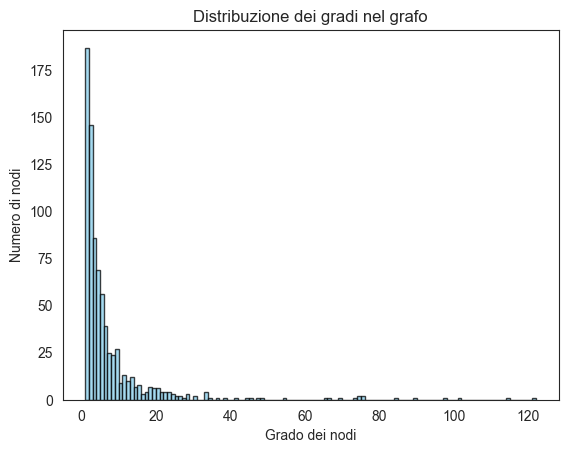

In [110]:
# Calcolare i gradi dei nodi
gradi = [G.degree(node) for node in G.nodes()]

# Visualizzare la distribuzione dei gradi
plt.hist(gradi, bins=range(min(gradi), max(gradi)+1), alpha=0.75, color='skyblue', edgecolor='black')
plt.xlabel('Grado dei nodi')
plt.ylabel('Numero di nodi')
plt.title('Distribuzione dei gradi nel grafo')
plt.show()


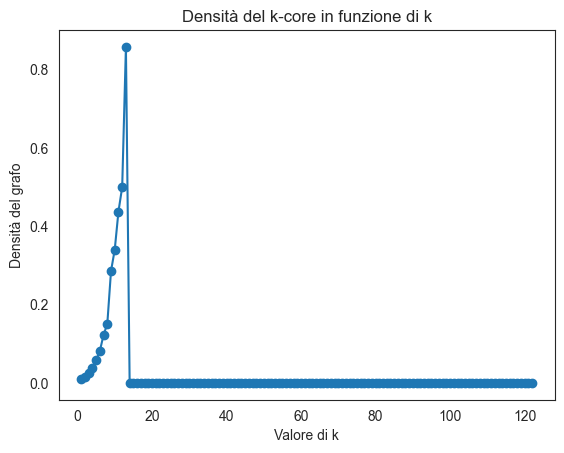

In [95]:
# Funzione per calcolare la densità di un grafo
def densita_grafo(G):
    return nx.density(G)

# Esplorare vari valori di k e calcolare la densità per ogni k-core
k_values = range(1, max(gradi) + 1)
densita_per_k = []

for k in k_values:
    G_kcore = nx.k_core(G, k)
    densita_per_k.append(densita_grafo(G_kcore))

# Visualizzare la densità per ogni valore di k
plt.plot(k_values, densita_per_k, marker='o')
plt.xlabel('Valore di k')
plt.ylabel('Densità del grafo')
plt.title('Densità del k-core in funzione di k')
plt.show()


In [96]:
# Trova il valore di k con la densità massima
k_max = k_values[densita_per_k.index(max(densita_per_k))]

# Stampa il valore di k più alto
print(f"Il valore di k con la densità massima è {k_max}")


Il valore di k con la densità massima è 13


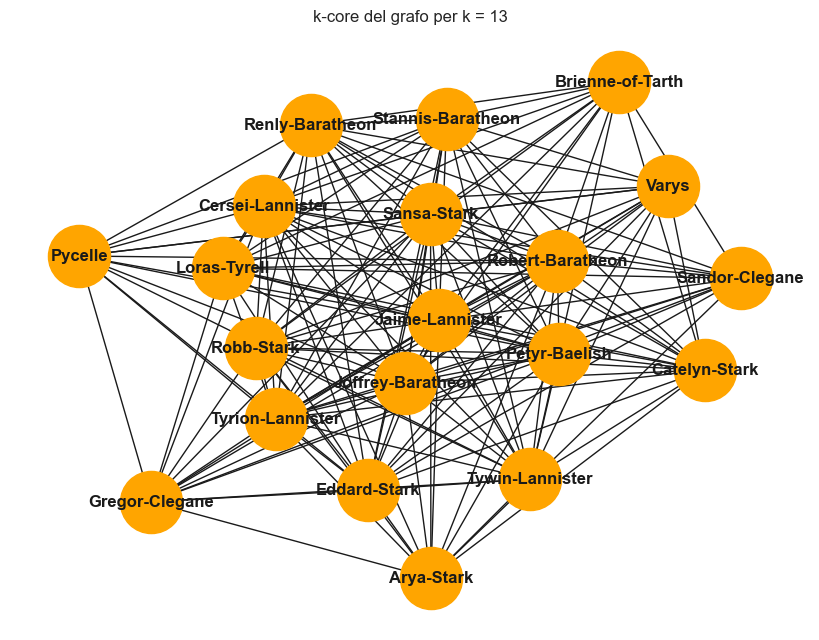

Nodi nel k-core con k = 13: ['Robert-Baratheon', 'Tyrion-Lannister', 'Sandor-Clegane', 'Catelyn-Stark', 'Sansa-Stark', 'Gregor-Clegane', 'Renly-Baratheon', 'Tywin-Lannister', 'Loras-Tyrell', 'Jaime-Lannister', 'Brienne-of-Tarth', 'Robb-Stark', 'Eddard-Stark', 'Cersei-Lannister', 'Pycelle', 'Joffrey-Baratheon', 'Arya-Stark', 'Petyr-Baelish', 'Varys', 'Stannis-Baratheon']


In [23]:
# Calcolare il k-core per k = 13
k = 13
G_kcore = nx.k_core(G, k)

# Visualizzare il k-core
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_kcore)  # Layout per disegnare i nodi
nx.draw(G_kcore, pos, with_labels=True, node_color='orange', node_size=2000, font_size=12, font_weight='bold')
plt.title(f"k-core del grafo per k = {k}")
plt.show()

# Stampare i nodi e le connessioni del k-core
print(f"Nodi nel k-core con k = {k}: {list(G_kcore.nodes())}")
# print(f"Archi nel k-core con k = {k}: {list(G_kcore.edges())}")

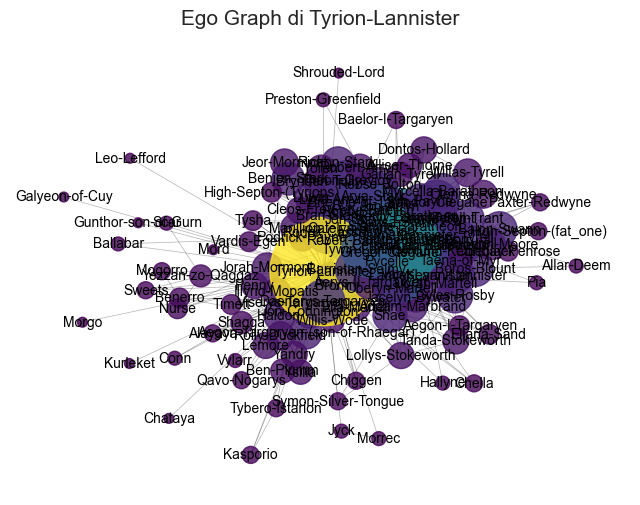

In [111]:
# Nome del personaggio per cui vogliamo creare l'ego graph
personaggio = "Tyrion-Lannister"  # Sostituisci con il personaggio di tuo interesse

# Crea l'ego graph per il personaggio specificato
ego_G = nx.ego_graph(G, personaggio)

# Layout per la disposizione dei nodi
pos = nx.spring_layout(ego_G, k=0.3, seed=42)

# Calcolare la dimensione dei nodi e il colore in base al grado
node_sizes = [ego_G.degree(n) * 50 for n in ego_G.nodes()]
node_colors = [ego_G.degree(n) for n in ego_G.nodes()]  # Colori in base al grado del nodo

# Visualizzare il grafo
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(ego_G, pos, node_size=node_sizes, cmap=plt.cm.viridis, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(ego_G, pos, alpha=0.3, width=0.5)
nx.draw_networkx_labels(ego_G, pos, font_size=10, font_color="black")

plt.title(f"Ego Graph di {personaggio}", fontsize=15)
plt.axis("off")
plt.show()

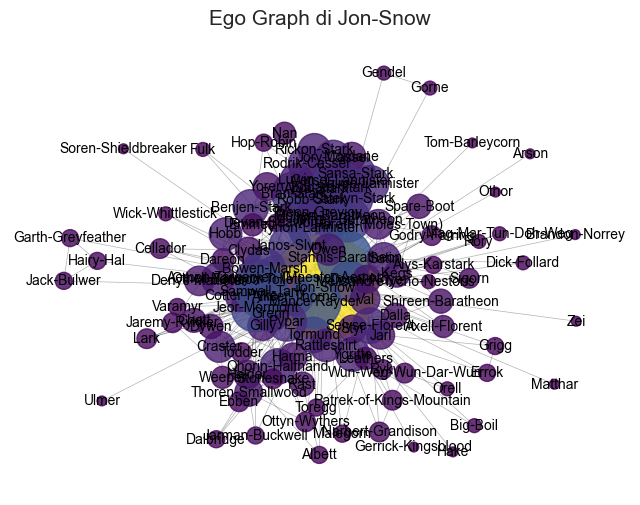

In [112]:
# Nome del personaggio per cui vogliamo creare l'ego graph
personaggio = "Jon-Snow"  # Sostituisci con il personaggio di tuo interesse

# Crea l'ego graph per il personaggio specificato
ego_G = nx.ego_graph(G, personaggio)

# Layout per la disposizione dei nodi
pos = nx.spring_layout(ego_G, k=0.3, seed=42)

# Calcolare la dimensione dei nodi e il colore in base al grado
node_sizes = [ego_G.degree(n) * 50 for n in ego_G.nodes()]
node_colors = [ego_G.degree(n) for n in ego_G.nodes()]  # Colori in base al grado del nodo

# Visualizzare il grafo
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(ego_G, pos, node_size=node_sizes, cmap=plt.cm.viridis, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(ego_G, pos, alpha=0.3, width=0.5)
nx.draw_networkx_labels(ego_G, pos, font_size=10, font_color="black")

plt.title(f"Ego Graph di {personaggio}", fontsize=15)
plt.axis("off")
plt.show()

In [66]:
# Funzione per calcolare la Group Degree Centrality
def group_degree_centrality(G, group):
    centrality = nx.degree_centrality(G)
    group_centrality = sum(centrality[node] for node in group)  # Somma delle centralità di grado dei nodi nel gruppo
    return group_centrality

# Funzione per calcolare la Group Closeness Centrality
def group_closeness_centrality(G, group):
    centrality = nx.closeness_centrality(G)
    group_centrality = sum(centrality[node] for node in group)  # Somma delle centralità di vicinanza dei nodi nel gruppo
    return group_centrality

# Funzione per calcolare la Group Betweenness Centrality
def group_betweenness_centrality(G, group):
    centrality = nx.betweenness_centrality(G)
    group_centrality = sum(centrality[node] for node in group)  # Somma delle centralità di intermediazione dei nodi nel gruppo
    return group_centrality

# Esempio: selezionare un gruppo di nodi (ad esempio, una clique)
group = ['Jon-Snow', 'Tyrion-Lannister']  # esempio di gruppo di personaggi

# Calcolare la Group Degree Centrality
degree_centrality = group_degree_centrality(G, group)

# Calcolare la Group Closeness Centrality
closeness_centrality = group_closeness_centrality(G, group)

# Calcolare la Group Betweenness Centrality
betweenness_centrality = group_betweenness_centrality(G, group)

# Visualizzare i risultati con grafici
centralities = {
    'Degree Centrality': degree_centrality,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality
}

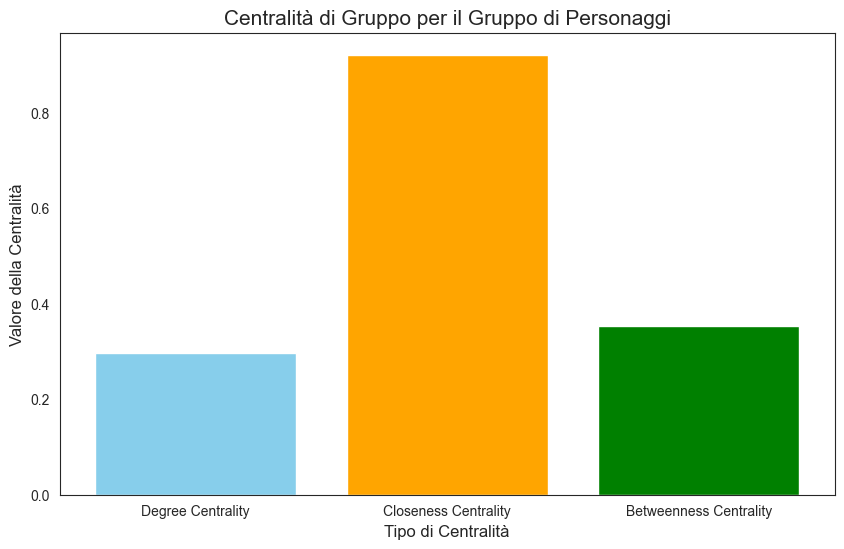

In [118]:
# Plotting dei grafici delle centralità
plt.figure(figsize=(10, 6))

# Grafico delle centralità
plt.bar(centralities.keys(), centralities.values(), color=['skyblue', 'orange', 'green'])

# Titolo e etichette
plt.title("Centralità di Gruppo per il Gruppo di Personaggi", fontsize=15)
plt.xlabel("Tipo di Centralità", fontsize=12)
plt.ylabel("Valore della Centralità", fontsize=12)

# Mostrare il grafico
plt.show()